In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Build model using LinearRegression

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
cars.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels',
       'curb-weight', 'engine-size', 'highway-mpg', 'price'],
      dtype='object')

In [4]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [5]:
X.sample(5)

,make,fuel-type,num-of-doors,body-style,drive-wheels,curb-weight,engine-size,highway-mpg
4,audi,gas,four,sedan,4wd,2824,136,22
123,porsche,gas,two,hardtop,rwd,2756,194,25
175,toyota,gas,two,hatchback,rwd,3016,171,24
143,subaru,gas,four,wagon,fwd,2455,108,31
146,toyota,gas,two,hatchback,fwd,1985,92,39


In [6]:
X  = pd.get_dummies(X)

In [7]:
X.shape,y.shape

((201, 37), (201,))

In [8]:
X.columns

Index(['curb-weight', 'engine-size', 'highway-mpg', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_renault', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [12]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]:.0f}")

curb-weight               6
engine-size               36
highway-mpg               -61
make_alfa-romero          -2153
make_audi                 2658
make_bmw                  7931
make_chevrolet            -121
make_dodge                -2116
make_honda                -1250
make_isuzu                -6058
make_jaguar               6193
make_mazda                -1128
make_mercedes-benz        6816
make_mercury              -1083
make_mitsubishi           -2902
make_nissan               -1874
make_peugot               -3491
make_plymouth             -2727
make_porsche              11762
make_renault              -3278
make_saab                 -340
make_subaru               -2340
make_toyota               -2902
make_volkswagen           -1492
make_volvo                -105
fuel-type_diesel          -15
fuel-type_gas             15
num-of-doors_four         33
num-of-doors_two          -33
body-style_convertible    2856
body-style_hardtop        -1070
body-style_hatchback      -133
body

In [14]:
model.intercept_

-4462.332309510857

### Calculate accuracy with train data

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [16]:
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train,y_pred)
print("MSE  : ", mse )
print("RMSE : ", np.sqrt(mse))

MSE  :  3914467.9839180126
RMSE :  1978.5014490563337


In [17]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.93


### Test with test data

In [18]:
y_pred = model.predict(X_test)

In [19]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6367777.45
Root Mean Squared Error : 2523.45
R2 Score: 0.93


<Axes: ylabel='price'>

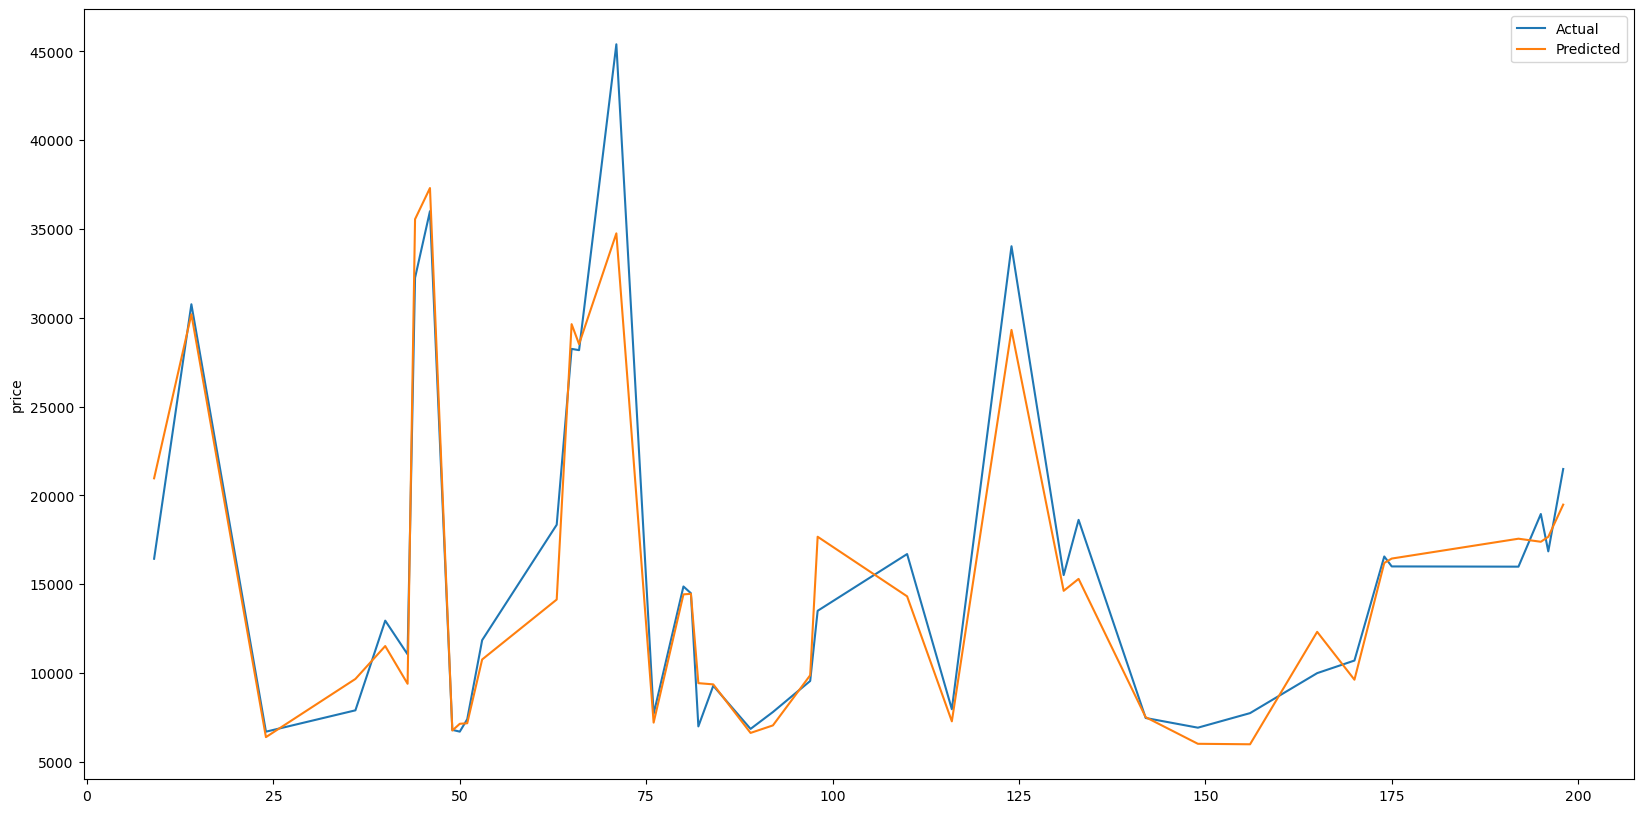

In [20]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [58]:
# Display % of difference 
for p,a in zip(y_pred[:10],y_test[:10]):
    d = p - a
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f} - {abs(d / a * 100):5.2f}")

  9943  -   10295 -   -352 -  3.42
  9456  -    8189 -   1267 - 15.47
  9297  -    7895 -   1402 - 17.76
 13981  -   18344 -  -4363 - 23.79
 16395  -   13200 -   3195 - 24.21
  9980  -    8921 -   1059 - 11.87
  9160  -    8195 -    965 - 11.77
 17000  -   13860 -   3140 - 22.65
  6247  -    7295 -  -1048 - 14.36
  4858  -    5399 -   -541 - 10.01


## Model with Standardization 

In [23]:
cars = pd.read_csv("final_cars.csv")

In [24]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [25]:
X = pd.get_dummies(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
## Scale X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train_data = pd.DataFrame(X_train_scaled,columns = X.columns)

In [61]:
X_test_data = pd.DataFrame(X_test_scaled,columns = X.columns)

In [62]:
X_test_data.head()

,curb-weight,engine-size,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,-0.352507,-0.403011,0.401993,-0.112509,-0.179605,-0.213896,-0.138233,-0.229416,5.066228,-0.112509,...,0.859727,-0.859727,-0.160128,-0.229416,-0.723747,1.078036,-0.367086,-0.197386,0.827170,-0.764303
1,-0.286438,-0.116107,0.246257,-0.112509,-0.179605,-0.213896,-0.138233,-0.229416,-0.197386,-0.112509,...,0.859727,-0.859727,-0.160128,-0.229416,-0.723747,1.078036,-0.367086,-0.197386,0.827170,-0.764303
2,-0.624792,-0.403011,0.401993,-0.112509,-0.179605,-0.213896,-0.138233,-0.229416,5.066228,-0.112509,...,-1.163160,1.163160,-0.160128,-0.229416,1.381699,-0.927613,-0.367086,-0.197386,0.827170,-0.764303
3,0.304181,0.170798,1.336408,-0.112509,-0.179605,-0.213896,-0.138233,-0.229416,-0.197386,-0.112509,...,0.859727,-0.859727,-0.160128,-0.229416,-0.723747,1.078036,-0.367086,-0.197386,-1.208941,1.308382
4,1.299223,0.601154,0.401993,-0.112509,-0.179605,-0.213896,-0.138233,-0.229416,-0.197386,-0.112509,...,0.859727,-0.859727,-0.160128,-0.229416,-0.723747,1.078036,-0.367086,-0.197386,-1.208941,1.308382


In [63]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test_scaled)

In [68]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 7129251.61
Root Mean Squared Error : 2670.07
Mean Absolute Error : 1886.31
R2 Score: 0.88


### Micro model with 2 features 

In [69]:
# Micro model
X_micro =  X[['engine-size','highway-mpg']]
y_micro =  y

In [70]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [71]:
micro_model = LinearRegression()
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression()

In [72]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7796926906820936

In [73]:
y_micro_pred = micro_model.predict(X_micro_test)

In [74]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

mse = mean_squared_error(y_micro_test,y_micro_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

R2 Score: 0.79
Mean Squared Error : 15885068.97
Root Mean Squared Error : 3985.61


## RandomForestRegressor 

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [78]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9844127906502833


In [79]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.93


In [80]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  6294845.371246613
RMSE :  2508.9530428540534


In [81]:
for f,v in sorted(zip (X_train.columns, model.feature_importances_),key = lambda t : t[1], reverse = True):
      print(f"{f:30} {v:0.5f}")

engine-size                    0.59225
curb-weight                    0.31276
highway-mpg                    0.04473
make_bmw                       0.01001
drive-wheels_rwd               0.00538
make_audi                      0.00483
make_subaru                    0.00356
fuel-type_gas                  0.00319
make_porsche                   0.00260
body-style_sedan               0.00247
body-style_wagon               0.00237
body-style_hardtop             0.00205
num-of-doors_two               0.00182
drive-wheels_fwd               0.00145
make_volvo                     0.00130
make_mazda                     0.00129
body-style_hatchback           0.00111
num-of-doors_four              0.00100
make_toyota                    0.00086
body-style_convertible         0.00081
make_nissan                    0.00074
make_volkswagen                0.00063
make_isuzu                     0.00055
make_alfa-romero               0.00053
drive-wheels_4wd               0.00047
make_mitsubishi          

<Axes: ylabel='price'>

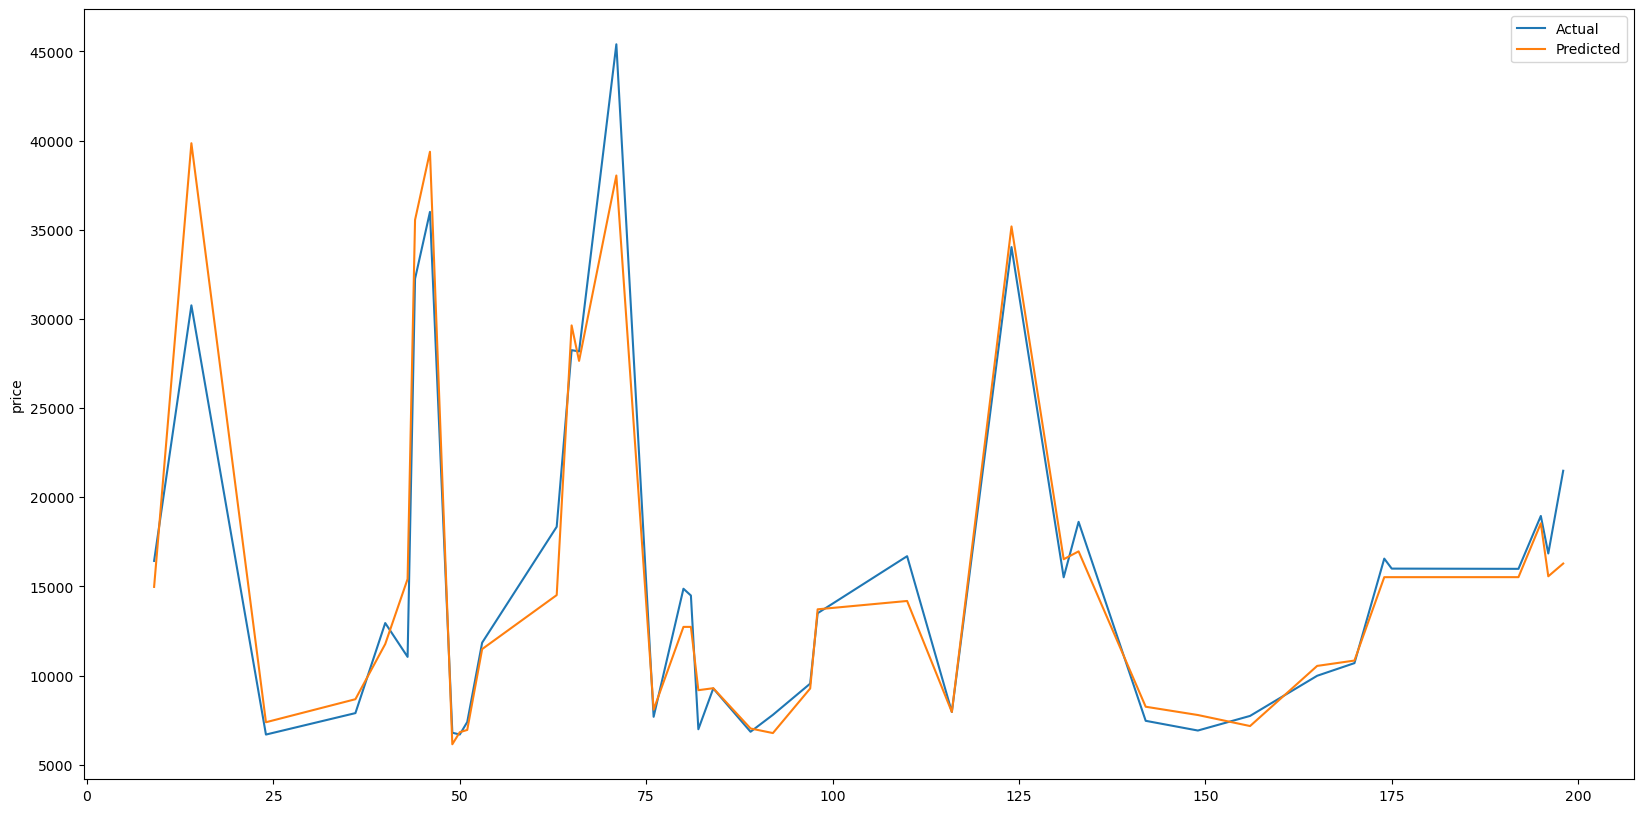

In [82]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [48]:
from sklearn.linear_model import SGDRegressor

In [49]:
X_mini = X[['curb-weight','engine-size','highway-mpg']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
## use same scale for X_train and X_test
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
model = SGDRegressor(max_iter=100)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')
print('No. of iterations = ', model.n_iter_)

Train score : 0.942078446499125
No. of iterations =  65


In [54]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.88


In [55]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  7178697.735753515
RMSE :  2679.309190025204
